# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Juan Hubert Liem
- **Email:** juanhl8010@gmail.com
- **ID Dicoding:** b25b9d052

# DESKRIPSI BISNIS BIKE SHARING
Sistem bike sharing merupakan generasi baru dari penyewaan sepeda tradisional, di mana seluruh proses mulai dari pendaftaran anggota, penyewaan, hingga pengembalian sepeda telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari suatu lokasi tertentu dan mengembalikannya di lokasi lain. Saat ini, terdapat lebih dari 500 program bike sharing di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. saat ini, sistem ini mendapat perhatian besar karena peran pentingnya dalam mengatasi masalah lalu lintas, lingkungan, dan kesehatan.
Selain memiliki penerapan yang menarik di dunia nyata, karakteristik data yang dihasilkan oleh sistem bike sharing juga menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan, dan posisi kedatangan dalam sistem ini tercatat secara eksplisit. Fitur ini menjadikan sistem bike sharing sebagai jaringan sensor virtual yang dapat digunakan untuk memantau mobilitas di kota. Oleh karena itu, diharapkan berbagai peristiwa penting di kota dapat terdeteksi melalui pemantauan data dari sistem ini.

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca dalam mempengaruhi jumlah pelanggan harian bike sharing di setiap musim pada periode tahun 2011-2012?
- Berdasarkan rentang waktu tahun 2011-2012 di jam berapa yang memiliki total jumlah pelanggan bike sharing tertinggi (Peak Hour)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("day.csv")
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
df_hour = pd.read_csv("hour.csv")
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Pada dataset "day" terdapat 731 row dan 16 kolom
- Pada dataset "hour" terdapat 17.370 row dan 17 kolom
- Kedua dataset memuat informasi tentang cuaca, musim, suhu, kelembapan, dan jumlah penyewaan sepeda (baik pengguna casual maupun registered).


### Assessing Data

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat tipe data pada df_hour dan df_day dan didapati kalau kolom dteday tipe datanya bukan date

In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Melihat missing value pada df_hour dan df_day dan didapati tidak ada missing value

In [ ]:
print("Jumlah Duplikasi dataset hour", df_hour.duplicated().sum())

Jumlah Duplikasi dataset hour 0


In [ ]:
print("Jumlah Duplikasi dataset day", df_day.duplicated().sum())

Jumlah Duplikasi dataset day 0


Melihat duplikasi data pada df_hour dan df_day dan didapati kalau kedua dataset tidak ada duplikasi data

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
cols_to_check = ['cnt', 'registered', 'casual']


for col in cols_to_check:
    q25, q75 = np.percentile(df_day[col], 25), np.percentile(df_day[col], 75)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr


    outliers = df_day[(df_day[col] < lower_bound) | (df_day[col] > upper_bound)]

    print(f"Kolom: {col}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Batas bawah: {lower_bound:.2f}")
    print(f"  Batas atas: {upper_bound:.2f}")
    print(f"  Jumlah outlier: {len(outliers)}")
    print("-" * 50)

Kolom: cnt
  IQR: 2804.00
  Batas bawah: -1054.00
  Batas atas: 10162.00
  Jumlah outlier: 0
--------------------------------------------------
Kolom: registered
  IQR: 2279.50
  Batas bawah: -922.25
  Batas atas: 8195.75
  Jumlah outlier: 0
--------------------------------------------------
Kolom: casual
  IQR: 780.50
  Batas bawah: -855.25
  Batas atas: 2266.75
  Jumlah outlier: 44
--------------------------------------------------


In [ ]:
cols_to_check = ['cnt', 'registered', 'casual']


for col in cols_to_check:
    q25, q75 = np.percentile(df_hour[col], 25), np.percentile(df_hour[col], 75)
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr


    outliers = df_hour[(df_hour[col] < lower_bound) | (df_hour[col] > upper_bound)]

    print(f"Kolom: {col}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Batas bawah: {lower_bound:.2f}")
    print(f"  Batas atas: {upper_bound:.2f}")
    print(f"  Jumlah outlier: {len(outliers)}")
    print("-" * 50)

Kolom: cnt
  IQR: 241.00
  Batas bawah: -321.50
  Batas atas: 642.50
  Jumlah outlier: 505
--------------------------------------------------
Kolom: registered
  IQR: 186.00
  Batas bawah: -245.00
  Batas atas: 499.00
  Jumlah outlier: 680
--------------------------------------------------
Kolom: casual
  IQR: 44.00
  Batas bawah: -62.00
  Batas atas: 114.00
  Jumlah outlier: 1192
--------------------------------------------------


Melakukan pengecekan outlier pada kolom cnt, registered dan casual di df_day dan df_hour

**Insight:**
- Dataset day dan hour tidak memiliki missing values, duplikasi data, maupun nilai yang tidak akurat, namun kolom dteday pada keduanya masih belum bertipe data date. Berdasarkan metode Interquartile Range (IQR), ditemukan sejumlah nilai ekstrem pada kolom casual, registered, dan cnt. Secara statistik nilai-nilai tersebut dapat dikategorikan sebagai outlier, namun secara kontekstual kemungkinan merepresentasikan lonjakan aktivitas peminjaman sepeda pada jam-jam sibuk (peak hours), sehingga tetap dianggap valid dan relevan untuk analisis lebih lanjut.
- Berdasarkan data, terdapat temuan menarik: pada df_hour nilai maksimum kolom weathersit adalah 4, sedangkan pada df_day nilai maksimumnya hanya 3. Perbedaan ini bisa menjadi poin menarik untuk dibahas lebih lanjut dalam analisis EDA.

### Cleaning Data

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [ ]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [ ]:
type(df_day['dteday'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight**

-  Kolom dteday pada dataset df_day dan df_hour setelah dicleaning semuanya bertipe data date

## Exploratory Data Analysis (EDA)

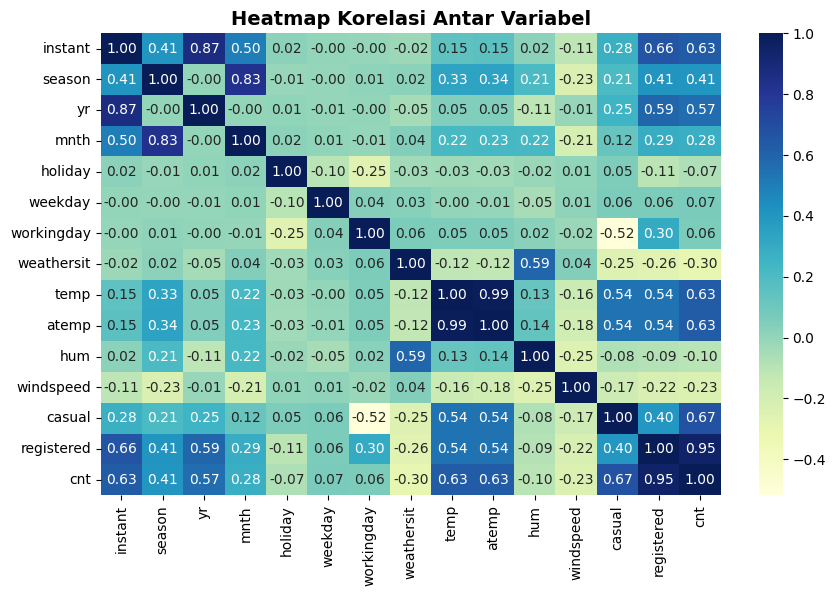

In [20]:
corr = df_day.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14, weight="bold")
plt.show()

Proses di atas adalah proses pembuatan heatmap untuk menunjukkan hubungan antar kolom pada df_day

In [21]:
df_day["season"] = df_day["season"].astype(int)
df_day["season"] = df_day["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})


In [22]:
df_day["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

Kode di atas berfungsi untuk mengonversi nilai numerik pada kolom season menjadi bentuk kategori yang lebih informatif, yaitu nama musim seperti *spring*, *summer*, *fall*, dan *winter*.


In [23]:
df_day.groupby (by="season").instant.nunique().sort_values(ascending=False)

,instant
season,
Fall,188
Summer,184
Spring,181
Winter,178


Proses ini bertujuan untuk mengetahui jumlah pelanggan harian bike sharing pada setiap musim, dan berdasarkan data, jumlah transaksi paling banyak tercatat pada musim Fall.

In [24]:
df_day["weathersit"] = df_day["weathersit"].astype(int)
df_day["weathersit"] = df_day["weathersit"].map({
    1: "Clear",
    2: "Mist",
    3: "Light Rain",
    4: "Heavy Rain"
})


In [25]:
df_day["weathersit"].unique()

array(['Mist', 'Clear', 'Light Rain'], dtype=object)

Kode di atas adalah kode untuk menkonversi nilai numerik pada kolom weathersit menjadi bentuk kategori seperti Clear, Mist, Light Rain, Heavy Rain

In [26]:
df_day.groupby (by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
Clear,463
Mist,247
Light Rain,21


Proses diatas dilakukan untuk mengetahui jumlah pelanggan harian bike sharing pada setiap kondisi cuaca, dan berdasarkan data, jumlah transaksi paling sering dilakukan saat cuaca cerah

In [27]:
df_day.groupby(["season", "weathersit"])["cnt"].agg(["max", "min", "std", "mean"])


max   min          std         mean
season weathersit                                      
Fall   Clear       8714  3285  1356.647125  5878.257353
       Light Rain  4459  1842  1199.339923  2751.750000
       Mist        7582  1115  1431.160502  5222.479167
Spring Clear       6312   431  1409.960622  2811.135135
       Light Rain  2169   441   826.272100   934.750000
       Mist        7836   605  1313.332082  2357.166667
Summer Clear       8294  2028  1467.655078  5548.548673
       Light Rain  1685   795   461.679543  1169.000000
       Mist        8362  1471  1579.038070  4236.705882
Winter Clear       8555  1495  1595.693909  5043.563107
       Light Rain  4639    22  1329.287378  1961.600000
       Mist        7852  1096  1523.445365  4654.000000

kode diatas adalah eksplorasi data untuk mencari hubungan antara season dan cuaca terhadap jumlah penyewa bike sharing, berdasarkan eksplorasi yang dilakukan secara harian rata-rata jumlah pelanggan bike rental tertinggi itu saat musim gugur dan kondisi cuacanya cerah

In [28]:
df_hour["season"] = df_hour["season"].astype(int)
df_hour["season"] = df_hour["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})


In [29]:
df_hour["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [30]:
df_hour["weathersit"] = df_hour["weathersit"].astype(int)
df_hour["weathersit"] = df_hour["weathersit"].map({
    1: "Clear",
    2: "Mist",
    3: "Light Rain",
    4: "Heavy Rain"
})


In [31]:
df_hour["weathersit"].unique()

array(['Clear', 'Mist', 'Light Rain', 'Heavy Rain'], dtype=object)

In [32]:
df_hour.groupby(["season", "weathersit"])["cnt"].agg(["max", "min", "std", "mean"])


max  min         std        mean
season weathersit                                  
Fall   Clear       977    1  201.732720  244.494207
       Light Rain  891    1  175.871513  171.955390
       Mist        868    2  185.406665  224.848997
Spring Clear       801    1  127.384258  122.055535
       Heavy Rain  164   23   77.925178   74.333333
       Light Rain  520    1   74.793446   58.650407
       Mist        712    1  106.154745  103.074689
Summer Clear       873    1  198.312457  232.410983
       Light Rain  782    1  130.760396  115.179803
       Mist        957    1  164.832349  181.261364
Winter Clear       967    1  190.891851  209.463779
       Light Rain  856    1  127.471365  116.453333
       Mist        905    1  173.833617  201.483974

Berdasarkan data pada hour.csv kondisi cuaca seperti heavy rain ini hanya terjadi saat musim spring dan yang menjadi keanehannya saat kondisi itu terjadi jumlah pelanggan secara minimalnya ini cukup besar yakni 23. Hal ini mungkin bisa lebih diulas lebih dalam dengan membedah data kolom hour

In [33]:
df_hour.groupby("hr")["cnt"].sum().sort_values(ascending=False)


,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Berdasarkan data hour.csv total jumlah pelanggan bike sharing paling tinggi itu di jam 5 sore dan terendah di jam 4 pagi

In [34]:
df_hour[df_hour["weathersit"] == "Heavy Rain"]


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2011-01-26,Spring,0,1,16,0,3,1,Heavy Rain,0.22,0.1970,0.93,0.3284,1,35,36
8854,8855,2012-01-09,Spring,1,1,18,0,1,1,Heavy Rain,0.20,0.2273,0.86,0.0896,6,158,164
9123,9124,2012-01-21,Spring,1,1,1,0,6,0,Heavy Rain,0.14,0.1364,0.86,0.1940,1,22,23


In [35]:
df_hour[df_hour["hr"] == 1]["cnt"].mean()


np.float64(33.3756906077348)

Berdasarkan data, kondisi cuaca heavy rain hanya terjadi sebanyak tiga kali, yaitu pada pukul 1 pagi, 4 sore, dan 6 sore. Kebingunganku mengenai alasan mengapa nilai minimum pada kondisi heavy rain lebih tinggi dibandingkan kondisi cuaca lain akhirnya terjawab — ternyata pada jam 1 pagi (waktu dengan transaksi terendah saat heavy rain), rata-rata jumlah transaksi hanya sekitar 33. Artinya, kondisi heavy rain pada jam tersebut tidak memiliki pengaruh besar terhadap peningkatan jumlah penyewa, apalagi karena kejadian ini hanya terjadi sekali sehingga masih belum cukup untuk dijadikan dasar validasi yang kuat.


**Insight:**
-  Berdasarkan heatmap yang dibuat, kondisi cuaca (weathersit) memiliki pengaruh negatif terhadap jumlah pelanggan harian. Saat cuaca memburuk seperti berawan tebal, hujan, atau kabut jumlah peminjaman sepeda menurun, terlepas dari musim yang sedang berlangsung. Cuaca cerah mendorong lebih banyak pelanggan di semua musim, sementara hujan menurunkan penggunaan sepeda bahkan di musim populer seperti musim panas.
- Korelasi antara season dengan jumlah pelanggan harian sekitar 0,41 artinya menunjukkan pengaruh positif moderat. ketika musim lagi hangat (summer dan fall) memiliki jumlah lebih banyak daripada musim yang lebih dingin
- Season dan weathersit punya korelasi lemah artinya setiap musim bisa mengalami cuaca buruk atau cerah tetapi dampaknya terhadap pelanggan tetap signifikan. Jadi meskipun musim tertentu seperti musim panas atau gugur memiliki lebih banyak pelanggan, jika cuaca di musim itu buruk (misalnya hujan), jumlah pelanggan tetap turun.
- Berdasarkan pengolahan data total jumlah pelanggan bike sharing didapati peak hour berada saat jam pulang kerja yakni antara jam 5-6 sore

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca dalam mempengaruhi jumlah pelanggan harian bike sharing di setiap musim pada periode tahun 2011-2012?

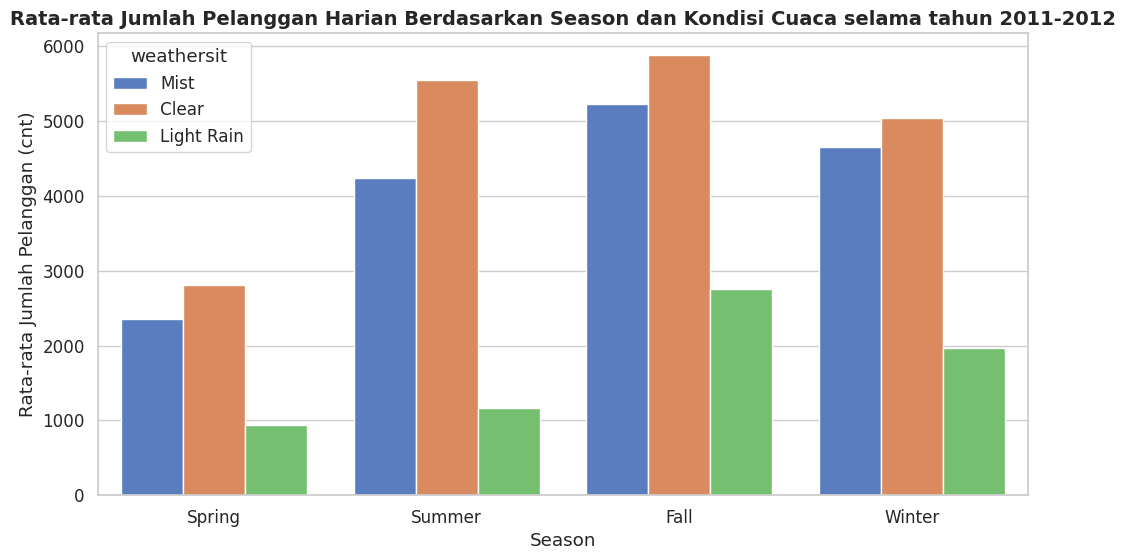

In [38]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


plt.figure(figsize=(12, 6))


sns.barplot(
    data=df_day,
    x="season",
    y="cnt",
    hue="weathersit",
    estimator="mean",
    errorbar=None
)


plt.title("Rata-rata Jumlah Pelanggan Harian Berdasarkan Season dan Kondisi Cuaca selama tahun 2011-2012", fontsize=14, weight="bold")
plt.xlabel("Season")
plt.ylabel("Rata-rata Jumlah Pelanggan (cnt)")


plt.show()


Melakukan visualisasi data untuk menganalisis bagaimana kondisi cuaca berpengaruh terhadap jumlah pelanggan harian pada setiap musim.

**Insight :**
- Berdasarkan visualisasi data kondisi cuaca memiliki pengaruh yang sangat signifikan terhadap jumlah pelanggan harian. Cuaca cerah mendorong peningkatan jumlah pelanggan di seluruh musim sedangkan cuaca buruk menyebabkan terjadi penurunan pelanggan. Meski demikian, pelanggan masih cenderung aktif saat cuaca berkabut dibanding saat hujan.
- Berdasarkan kondisi musim, musim panas dan gugur memiliki jumlah pelanggan bike sharing yang lebih banyak dibanding musim semi dan dingin ini sesuai dengan korelasi heatmap antara kolom season dan cnt


### Pertanyaan 2: Berdasarkan rentang waktu tahun 2011-2012 di jam berapa yang memiliki total jumlah pelanggan bike sharing tertinggi (Peak Hour)?

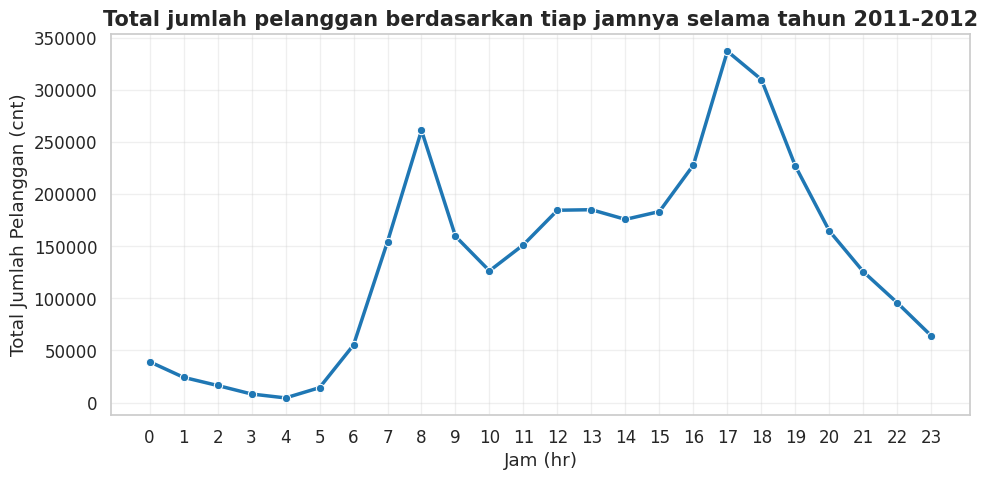

In [39]:


hourly_counts = df_hour.groupby("hr")["cnt"].sum().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(
    data=hourly_counts,
    x="hr", y="cnt",
    marker="o",
    linewidth=2.5,
    color="#1f77b4"
)


plt.title("Total jumlah pelanggan berdasarkan tiap jamnya selama tahun 2011-2012", fontsize=15, weight="bold")
plt.xlabel("Jam (hr)")
plt.ylabel("Total Jumlah Pelanggan (cnt)")
plt.grid(alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


Melakukan visualisasi data untuk melihat total jumlah pelanggan berdasarkan tiap jamnya

**Insight:**
- Berdasarkan visualisasi data yang sudah dilakukan jam berangkat kerja dan jam pulang kerja merupakan peak hour dari layanan bike sharing
- Setelah jam pulang kerja berakhir, terjadi penurunan jumlah pengguna bike sharing yang signifikan. Hal ini wajar karena di jam tersebut orang banyak yang beristirahat di rumah
- Hal ini menandakan bahwa user dari pengguna bike sharing ini kebanyakan adalah para pekerja atau anak kuliah yang menggunakan sarana sepeda untuk ke tempat kerja

## Analisis Lanjutan (Opsional)

Pengelompokan hari dalam dataset Bike Sharing berdasarkan kesamaan pola penggunaan sepeda dengan mempertimbangkan faktor temperatur dan jumlah penyewaan harian.

In [46]:
df_day["temp"] = df_day["temp"] * 41

Mengubah kolom temp ke dalam bentuk celcius

In [48]:
features = df_day[['temp', 'cnt']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Melakukan standarisasi scaler karena antara kolom temp dan cnt memiliki skala yang berbeda

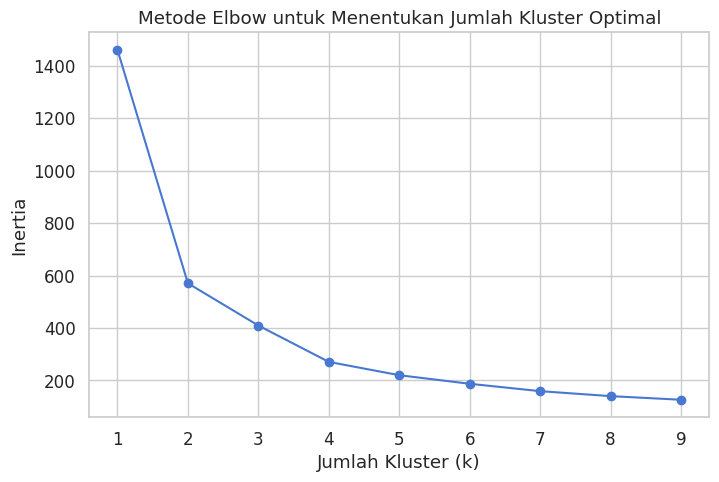

In [49]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.xlabel('Jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.show()

Metode elbow untuk mendapatkan titik siku untuk menunjukkan nilai k atau jumlah cluster terbaik

In [50]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.505
k=3, Silhouette Score=0.394
k=4, Silhouette Score=0.429
k=5, Silhouette Score=0.404
k=6, Silhouette Score=0.383
k=7, Silhouette Score=0.398
k=8, Silhouette Score=0.390
k=9, Silhouette Score=0.371


Menggunakan metode silhouette untuk mendapatkan score kualitas cluster semakin tinggi angkanya maka semakin baik dan berdasarkan metode tersebut didapatkan kalo 2 cluster adalah jumlah cluster yang paling optimum

In [51]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_day['cluster'] = kmeans.fit_predict(scaled_features)
df_day.groupby('cluster')[['temp', 'cnt']].mean()

,temp,cnt
cluster,,
0,13.448945,2891.478395
1,25.773266,5788.304668


Menghitung nilai rata-rata dari setiap kolom temp dan cnt yang digunakan dalam proses clustering menghasilkan dua kelompok (cluster) yang berbeda.

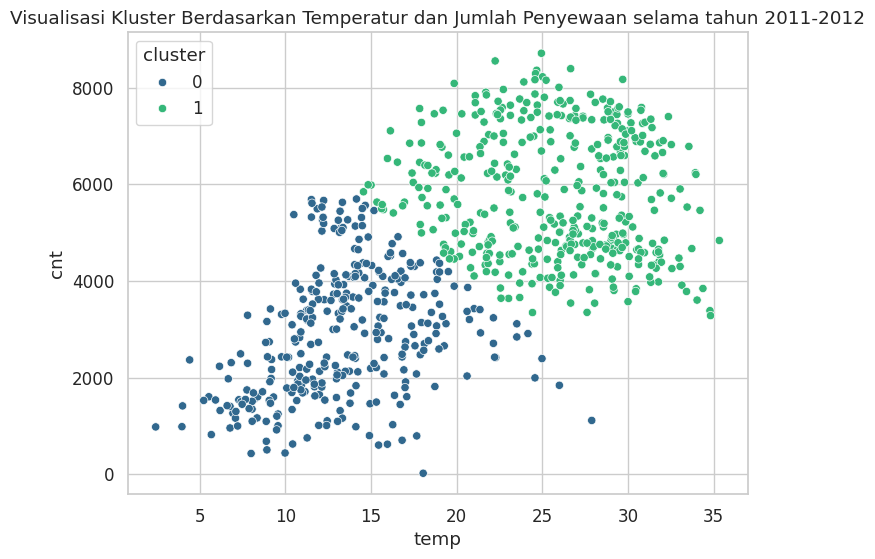

In [52]:


plt.figure(figsize=(8,6))
sns.scatterplot(
    x='temp', y='cnt',
    hue='cluster',
    palette='viridis',
    data=df_day
)
plt.title('Visualisasi Kluster Berdasarkan Temperatur dan Jumlah Penyewaan selama tahun 2011-2012')
plt.show()


Melakukan visualisasi cluster berdasarkan temperatur dan jumlah penyewaan

**Insight**
- Terdapat 2 cluster optimum yang bisa mengelompokkan data berdasarkan temperatur dan jumlah penyewaan, yakni cluster 0 : saat suhu rendah, cluster 1 : saat suhu hangat
- Berdasarkan visualisasi data yang sudah dilakukan temperatur suhu sangat berpengaruh terhadap jumlah penyewa sepeda, semakin hangat temperatur maka semakin tinggi jumlah pengguna sepeda

## Conclusion

- Kondisi cuaca sangat berpengaruh terhadap jumlah pelanggan harian disetiap musim, ketika cuaca cerah itu akan lebih meningkatkan jumlah pengguna harian hampir diseluruh musim, tetapi ketika cuaca buruk (hujan) itu akan menyebabkan terjadinya penurunan pelanggan. Selain itu faktor temperatur suhu itu juga menjadi pengaruh, jumlah pengguna meningkat ketika suhu udara hangat.
- Berdasarkan tahapan analisis data yang sudah dilakukan diketahui bahwa saat jam pulang kerja dan jam berangkat kerja merupakan peak hour dari layanan bisnis bike sharing. Hal ini menandakan bahwa customer kebanyakan adalah pegawai kantoran dan anak kuliah